https://finance.yahoo.com/calendar/earnings/?day=2023-12-19
Options data for FDS:
Average IV for Calls: 0.12144290902645713
Average IV for Puts: 0.15518163266809232
Total Call Volume: 460.0
Total Call open interest: 705
Total Call engagement: 1165.0
Total Put Volume: 224.0
Total Put open interest: 719
Total Put engagement: 943.0
Number of ITM Call Options: 22
Number of ITM Put Options: 7


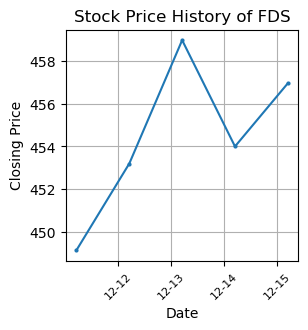

Options data for FDS:
Average IV for Calls: 0.12144290902645713
Average IV for Puts: 0.15518163266809232
Total Call Volume: 460.0
Total Call open interest: 705
Total Call engagement: 1165.0
Total Put Volume: 224.0
Total Put open interest: 719
Total Put engagement: 943.0
Number of ITM Call Options: 22
Number of ITM Put Options: 7


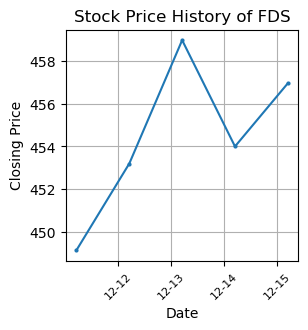

Options data for ACN:
Average IV for Calls: 0.0442433522654473
Average IV for Puts: 0.16122356857394668
Total Call Volume: 4003.0
Total Call open interest: 38863
Total Call engagement: 42866.0
Total Put Volume: 2617.0
Total Put open interest: 36304
Total Put engagement: 38921.0
Number of ITM Call Options: 199
Number of ITM Put Options: 63


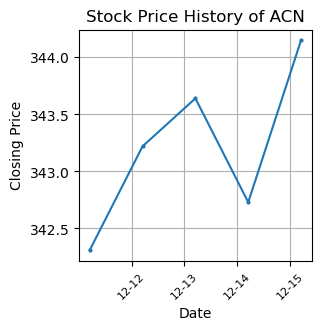

Options data for ACN:
Average IV for Calls: 0.0442433522654473
Average IV for Puts: 0.16122356857394668
Total Call Volume: 4003.0
Total Call open interest: 38863
Total Call engagement: 42866.0
Total Put Volume: 2617.0
Total Put open interest: 36304
Total Put engagement: 38921.0
Number of ITM Call Options: 199
Number of ITM Put Options: 63


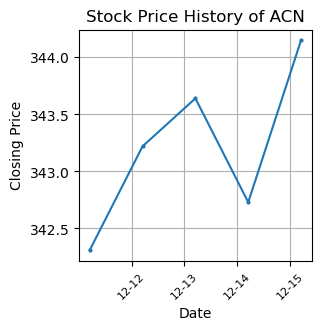

Options data for FDX:
Average IV for Calls: 0.05126945602594657
Average IV for Puts: 0.18725140540265103
Total Call Volume: 10456.0
Total Call open interest: 67890
Total Call engagement: 78346.0
Total Put Volume: 11219.0
Total Put open interest: 81864
Total Put engagement: 93083.0
Number of ITM Call Options: 278
Number of ITM Put Options: 75


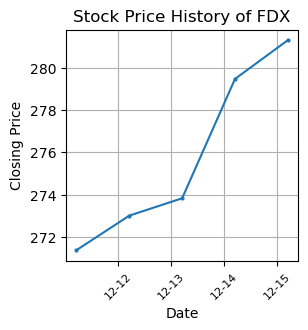

Options data for FDX:
Average IV for Calls: 0.05126945602594657
Average IV for Puts: 0.18725140540265103
Total Call Volume: 10456.0
Total Call open interest: 67890
Total Call engagement: 78346.0
Total Put Volume: 11219.0
Total Put open interest: 81864
Total Put engagement: 93083.0
Number of ITM Call Options: 278
Number of ITM Put Options: 75


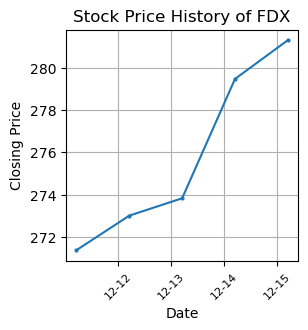

Options data for HEI:
Average IV for Calls: 0.08131731563895091
Average IV for Puts: 0.12844967773437496
Total Call Volume: 443.0
Total Call open interest: 2073
Total Call engagement: 2516.0
Total Put Volume: 281.0
Total Put open interest: 489
Total Put engagement: 770.0
Number of ITM Call Options: 21
Number of ITM Put Options: 3


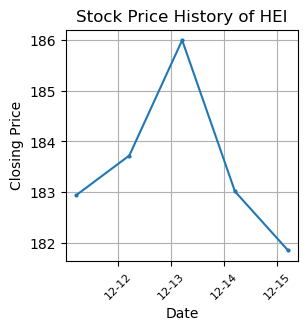

Options data for SCCO:
Average IV for Calls: 0.07734190397201927
Average IV for Puts: 0.22616847428928596
Total Call Volume: 985.0
Total Call open interest: 13139
Total Call engagement: 14124.0
Total Put Volume: 1112.0
Total Put open interest: 9621
Total Put engagement: 10733.0
Number of ITM Call Options: 79
Number of ITM Put Options: 35


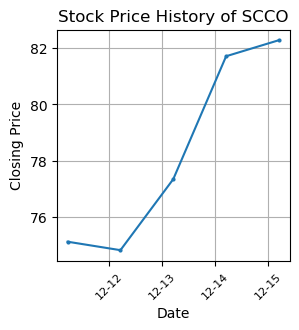

Options data for MU:
Average IV for Calls: 0.053818924966302834
Average IV for Puts: 0.19450622537129902
Total Call Volume: 38845.0
Total Call open interest: 446924
Total Call engagement: 485769.0
Total Put Volume: 35232.0
Total Put open interest: 564749.0
Total Put engagement: 599981.0
Number of ITM Call Options: 314
Number of ITM Put Options: 103


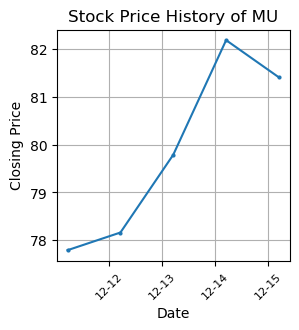

Options data for WOR:
Average IV for Calls: 0.07422483718673904
Average IV for Puts: nan
Total Call Volume: 169.0
Total Call open interest: 865
Total Call engagement: 1034.0
Total Put Volume: 99.0
Total Put open interest: 345.0
Total Put engagement: 444.0
Number of ITM Call Options: 14
Number of ITM Put Options: 8


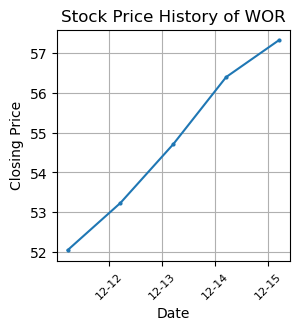

Options data for EPAC:
Average IV for Calls: 0.2744219056532118
Average IV for Puts: 0.3561268668619792
Total Call Volume: 132.0
Total Call open interest: 122
Total Call engagement: 254.0
Total Put Volume: 185.0
Total Put open interest: 531
Total Put engagement: 716.0
Number of ITM Call Options: 5
Number of ITM Put Options: 4


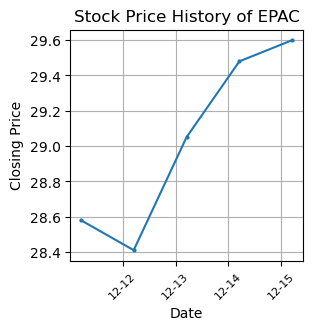

Options data for CCL:
Average IV for Calls: 0.05424015398010141
Average IV for Puts: 0.28615433436461635
Total Call Volume: 30205.0
Total Call open interest: 837539
Total Call engagement: 867744.0
Total Put Volume: 22955.0
Total Put open interest: 1232265
Total Put engagement: 1255220.0
Number of ITM Call Options: 191
Number of ITM Put Options: 84


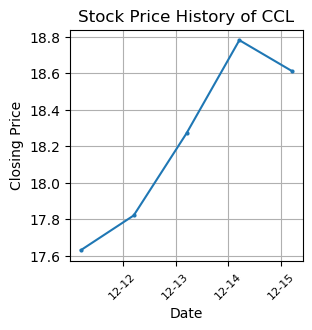

Options data for SCS:
Average IV for Calls: 0.25960287420363654
Average IV for Puts: 0.362230759765625
Total Call Volume: 1585.0
Total Call open interest: 5003
Total Call engagement: 6588.0
Total Put Volume: 341.0
Total Put open interest: 984
Total Put engagement: 1325.0
Number of ITM Call Options: 8
Number of ITM Put Options: 5


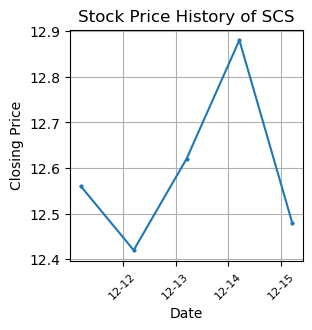

Options data for QIPT:
Average IV for Calls: 0.26921427490234373
Average IV for Puts: nan
Total Call Volume: 140.0
Total Call open interest: 1475
Total Call engagement: 1615.0
Total Put Volume: 60.0
Total Put open interest: 360.0
Total Put engagement: 420.0
Number of ITM Call Options: 3
Number of ITM Put Options: 3


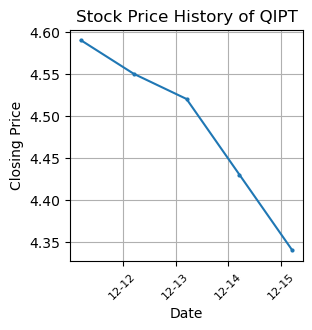

Options data for FCEL:
Average IV for Calls: 0.20621499755425496
Average IV for Puts: 0.3711078145915214
Total Call Volume: 13977.0
Total Call open interest: 109306
Total Call engagement: 123283.0
Total Put Volume: 2404.0
Total Put open interest: 23008
Total Put engagement: 25412.0
Number of ITM Call Options: 30
Number of ITM Put Options: 45


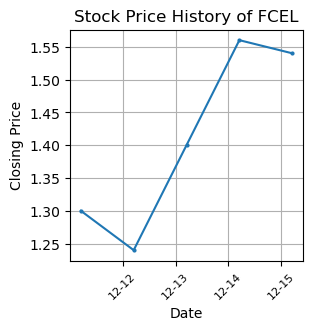

Options data for FCEL:
Average IV for Calls: 0.20621499755425496
Average IV for Puts: 0.3711078145915214
Total Call Volume: 13977.0
Total Call open interest: 109306
Total Call engagement: 123283.0
Total Put Volume: 2404.0
Total Put open interest: 23008
Total Put engagement: 25412.0
Number of ITM Call Options: 30
Number of ITM Put Options: 45


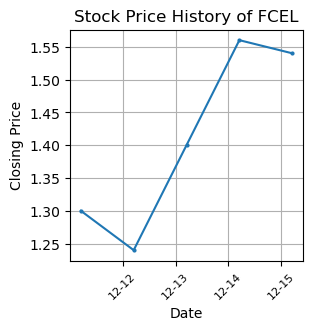

Options data for OGI:
Average IV for Calls: 0.7141664672851562
Average IV for Puts: nan
Total Call Volume: 1712.0
Total Call open interest: 17570
Total Call engagement: 19282.0
Total Put Volume: 98.0
Total Put open interest: 945.0
Total Put engagement: 1043.0
Number of ITM Call Options: 4
Number of ITM Put Options: 9


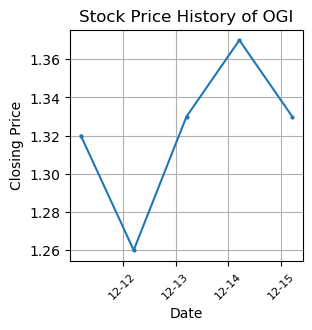

Options data for OGI:
Average IV for Calls: 0.7141664672851562
Average IV for Puts: nan
Total Call Volume: 1712.0
Total Call open interest: 17570
Total Call engagement: 19282.0
Total Put Volume: 98.0
Total Put open interest: 945.0
Total Put engagement: 1043.0
Number of ITM Call Options: 4
Number of ITM Put Options: 9


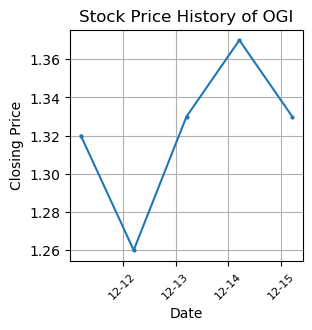

Options data for RADCQ:
Average IV for Calls: 0.6916976172052154
Average IV for Puts: 0.6169772029212727
Total Call Volume: 1287.0
Total Call open interest: 46638.0
Total Call engagement: 47925.0
Total Put Volume: 1850.0
Total Put open interest: 140076.0
Total Put engagement: 141926.0
Number of ITM Call Options: 0
Number of ITM Put Options: 60


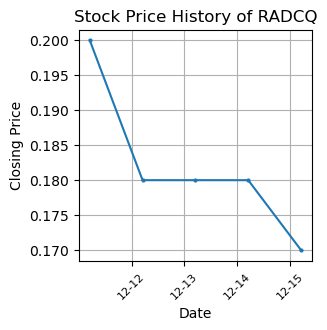

In [2]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-19'
ticker_data_sorted = scrape_and_process_yahoo_finance_data(day)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date - timedelta(days=1)
start_date = release_date - timedelta(days=8)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
